In [121]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
x=[]
df = pd.DataFrame()

for paths, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/shared/homeworks/python_ds_miniprojects/4/data/'):
    for filename in files:
        x.append(paths + '/' + filename)

for i in x:
 
    df2 = pd.read_csv(i)
    i = i.split('/')
    date = i[10]
    name = i[11]
    df2['date'] = date
    df2['name'] = name
    df = pd.concat([df, df2])

df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
0,55,3,2020-12-05,Petr_Smirnov
1,49,3,2020-12-05,Petr_Smirnov
2,22,5,2020-12-05,Petr_Smirnov
3,83,4,2020-12-05,Petr_Smirnov
0,66,2,2020-12-05,Rostislav_Smirnov


In [112]:
df.quantity.sum()

480

In [113]:
df.groupby('name', as_index=False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [114]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [120]:
df444 = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)
df444

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


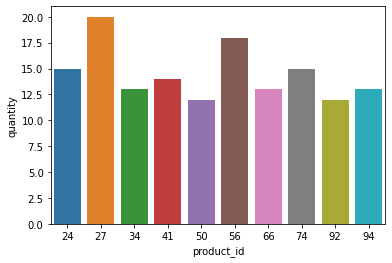

In [129]:
sns.barplot(data=df444, x='product_id', y='quantity')

In [135]:
df555 = df.groupby('date', as_index=False).agg({'quantity':'sum'}).sort_values('date', ascending=True)
df555

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


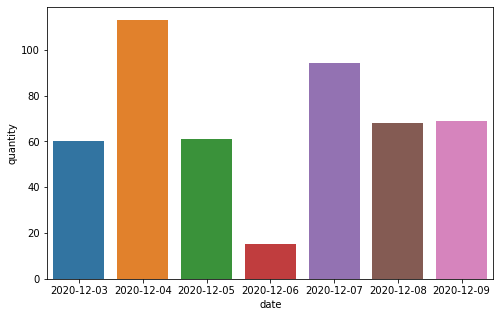

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(data=df555, x='date', y='quantity')

In [156]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [175]:
lol = df.groupby(['name', 'product_id']).agg({'quantity':'nunique'})
lol

quantity
name           product_id          
Alexey_Fedorov 13                 1
               15                 1
               18                 1
               34                 1
               50                 1
...                             ...
Vasiliy_Ivanov 83                 1
               94                 1
               95                 1
Vasiliy_Petrov 27                 1
               78                 1

[158 rows x 1 columns]

In [176]:
lol.query('quantity > 1')

,,quantity
name,product_id,
Alexey_Smirnov,55,2
Anton_Ivanov,15,2
